In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("../../Data/RestaurantVisitors.csv", index_col ='date', parse_dates = True)

In [9]:
df.index.freq = 'D'

In [10]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [11]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [12]:
df1 = df.dropna()

In [13]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [14]:
## customer viting cannot  be in fractions so chanign to int
df.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [15]:
cols = ['rest1', 'rest2', 'rest3',
       'rest4', 'total']

In [17]:
for col in cols:
    df1[col] = df1[col].astype(int)

<Axes: xlabel='date'>

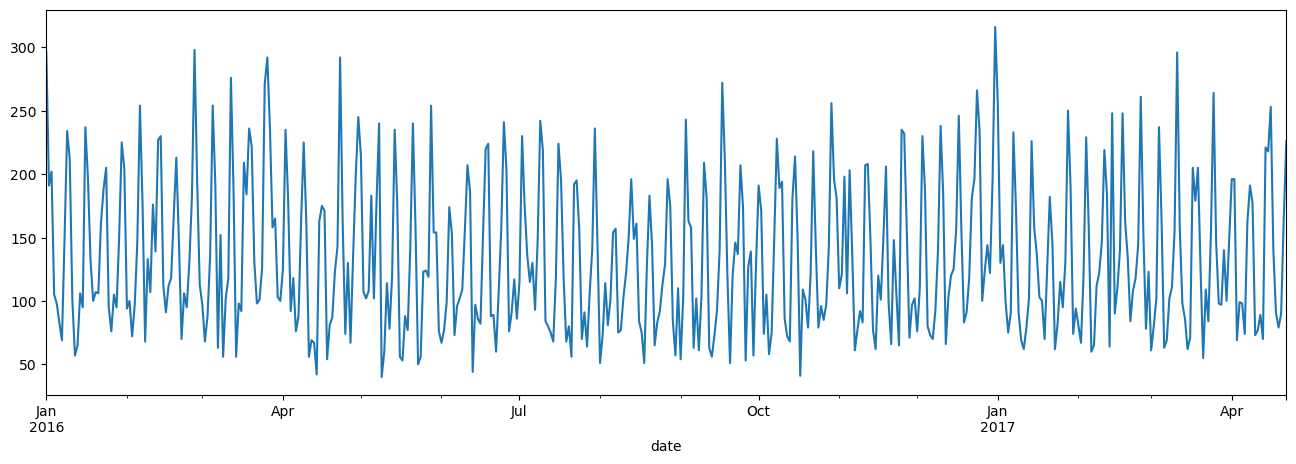

In [18]:
df1['total'].plot(figsize = (16,5))

In [23]:
weekend_idx = df1[df1['holiday']==1].index

# getting where holiday is there

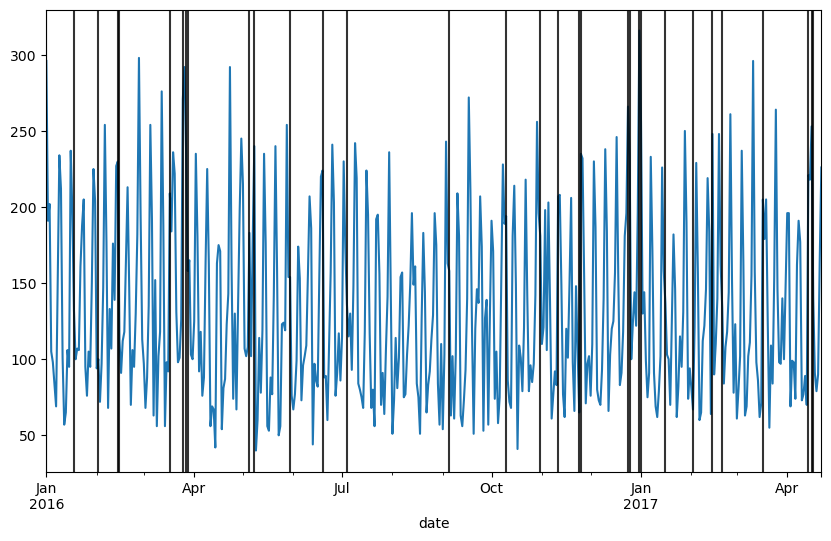

In [24]:
ax  =df1['total'].plot(figsize = (10,6))
## adding vertical lines for holidays
for day in weekend_idx:
    ax.axvline(x = day, c = 'black', alpha = 0.8)

In [25]:
## not that clear using plots if there is direct rel between the holiday and increase in the res sales

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
result = seasonal_decompose(df1['total'])

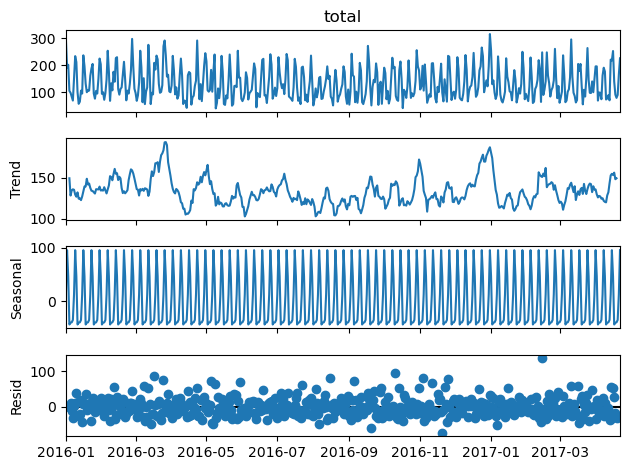

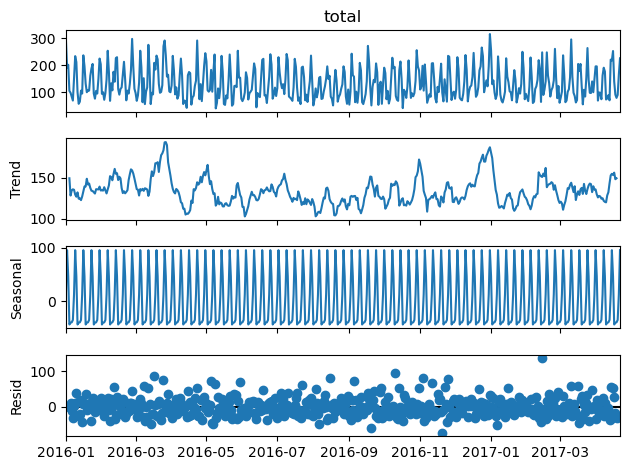

In [29]:
result.plot()

In [31]:
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29',
               '2017-05-30', '2017-05-31'],
              dtype='datetime64[ns]', name='date', length=517, freq='D')

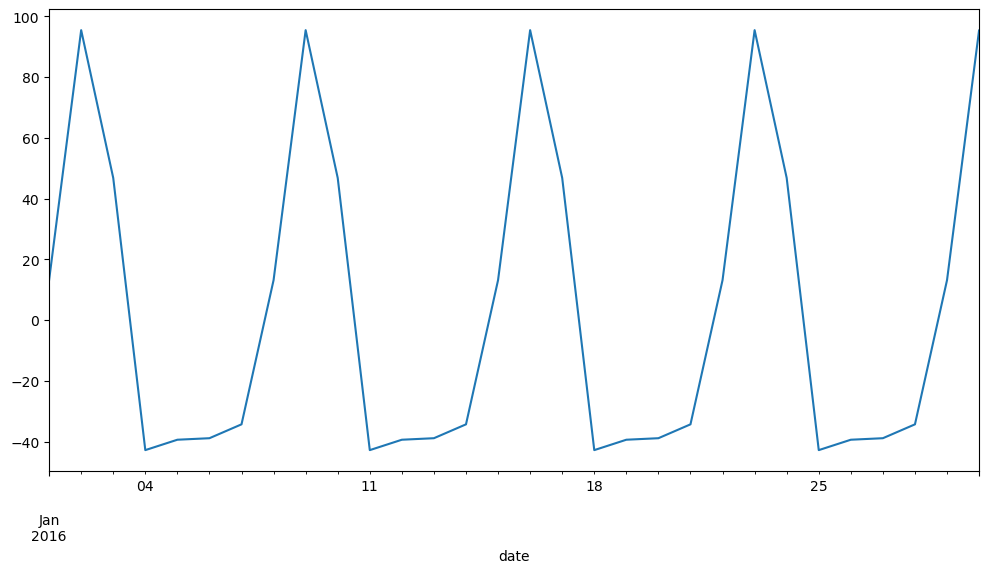

In [38]:
# for sure a seasinal composenet but how to identify the time of seasonality
# zomming in?
import matplotlib.pyplot as plt
plt.figure(figsize= (12,6))
result.seasonal.plot()
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2016-01-30'))
plt.show()

In [39]:
## cycle repeating in every week

len(df1)

478

In [41]:
# We want to forecast a month into fututre so test set should be 4 weeks
train = df1.iloc[:436]
test = df1.iloc[436:]



In [42]:
from pmdarima import auto_arima

In [43]:
auto_arima(df1['total'], seasonal = True, m = 7).summary()
# author suggested to use full data to get the sarimax paramters
# though i think can cause info leak 
## 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2392.393
Date:                   Tue, 24 Sep 2024   AIC                           4792.787
Time:                           19:21:45   BIC                           4809.465
Sample:                       01-01-2016   HQIC                          4799.344
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.5681      1.962      3.858      0.000       3.723      11.413
ar.S.L7        0.9458      0.014     69.436      0.000       0.919       0.973
ma.S.L7       -0.6268      0.048    -13.109      0.000      -0.720      -0.533
sigma2      1178.2454     66.492     17.720      0.000    1047.924    1308.566
===================================================================================
Ljung-Box (L1) (Q):                  14.52   Jarque-Bera (JB):                43.27
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.61
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
#SARIMAX(1, 0, [1], 7)	
# for sarima (1,0,0) 
# for seasonal (1,0,1,7) PDQS

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
model = SARIMAX(train['total'], order = (1,0,0), seasonal_order = (1,0,1,7))

In [51]:
## ENFORCE INVERTABIITY used becuase in this way sarimax imp internally

In [52]:
results = model.fit()

In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2155.511
Date:                             Tue, 24 Sep 2024   AIC                           4319.023
Time:                                     19:35:18   BIC                           4335.333
Sample:                                 01-01-2016   HQIC                          4325.460
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2194      0.043      5.067      0.000       0.135       0.304
ar.S.L7        0.9999      0.000   8030.756      0.000       1.000       1.000
ma.S.L7       -0.9405      0.023    -40.040      0.000      -0.987      -0.894
sigma2      1068.8267     54.343     19.668      0.000     962.317    1175.336
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):               106.77
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.77
Prob(H) (two-sided):                  0.61   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start,end).rename('SARIMA predictions')

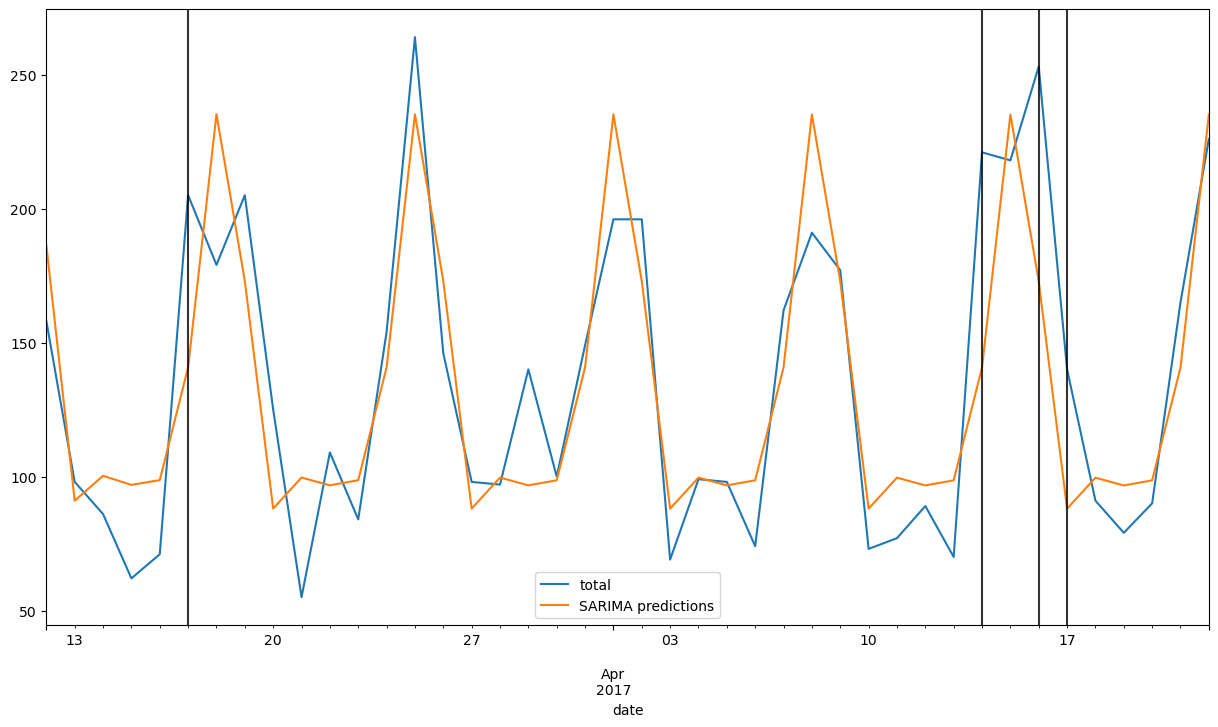

In [58]:
ax = test['total'].plot(legend = True, figsize = (15,8))
predictions.plot(legend = True)
for day in weekend_idx:
    ax.axvline(x = day, c = 'black', alpha = 0.8)

In [59]:
## Looks like adding holidays can have good eff in sarimax variable exogenous

In [60]:
from statsmodels.tools.eval_measures import rmse

In [62]:
rmse(test['total'], predictions)

31.968743538342018

In [63]:
test['total'].mean()

134.26190476190476

In [64]:
## ok not exellent for sure

### ADDing exogenous var on seasonal arima model  (X) part

In [66]:
# soppose we choose our exogenous var as x then if we want to predict for next 3 months then in that case we should know 
# values of exogenous variable fot next 3 months
# if we dont have the values we can put the best estimations as per us 

In [70]:
auto_arima(df1['total'], exogenous = df1[['holiday']],seasonal = True, m = 7).summary()

## extra set of brackets added since it asks for a df as input


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2392.393
Date:                   Wed, 25 Sep 2024   AIC                           4792.787
Time:                           00:29:13   BIC                           4809.465
Sample:                       01-01-2016   HQIC                          4799.344
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.5681      1.962      3.858      0.000       3.723      11.413
ar.S.L7        0.9458      0.014     69.436      0.000       0.919       0.973
ma.S.L7       -0.6268      0.048    -13.109      0.000      -0.720      -0.533
sigma2      1178.2454     66.492     17.720      0.000    1047.924    1308.566
===================================================================================
Ljung-Box (L1) (Q):                  14.52   Jarque-Bera (JB):                43.27
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.61
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
model = SARIMAX(train['total'], exog=train[['holiday']], order = (1,0,1), seasonal_order= (1,0,1,7),enforce_invertability = False)

In [72]:
result = model.fit()

In [73]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2093.746
Date:                           Wed, 25 Sep 2024   AIC                           4199.493
Time:                                   00:31:53   BIC                           4223.958
Sample:                               01-01-2016   HQIC                          4209.148
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       69.6090      4.163     16.722      0.000      61.450      77.768
ar.L1          0.9997      0.001   1276.097      0.000       0.998       1.001
ma.L1         -0.9983      0.004   -234.569      0.000      -1.007      -0.990
ar.S.L7        0.9996      0.000   2089.265      0.000       0.999       1.001
ma.S.L7       -0.9480      0.029    -32.811      0.000      -1.005      -0.891
sigma2       812.2376     47.336     17.159      0.000     719.461     905.014
===================================================================================
Ljung-Box (L1) (Q):                  15.53   Jarque-Bera (JB):                22.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.28
Prob(H) (two-sided):                  0.97   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
# predictions : while making the predictions of total for test data we would have to also 
# provide the exogenous variable for test data
# total does not have to be provided
start = len(train)
end = len(train) + len(test)-1


In [75]:
predictions = result.predict(start, end ,exog = test[['holiday']]).rename('sarima x with ecogenous')

<Axes: xlabel='date'>

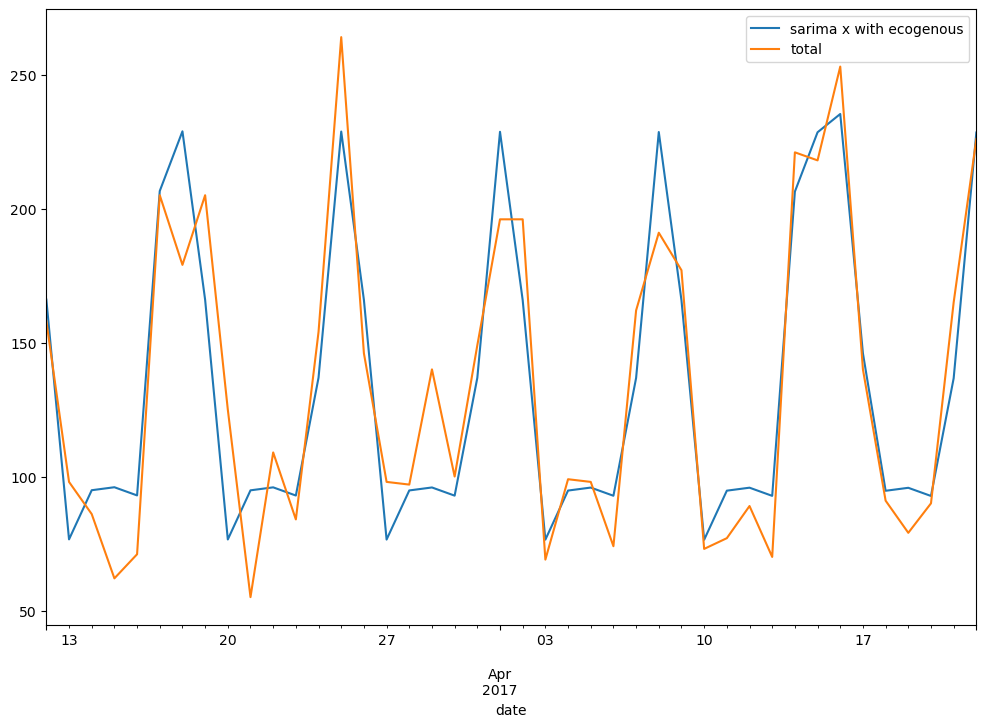

In [78]:
ax = predictions.plot(figsize = (12,8), legend = True)
test['total'].plot(legend = True)

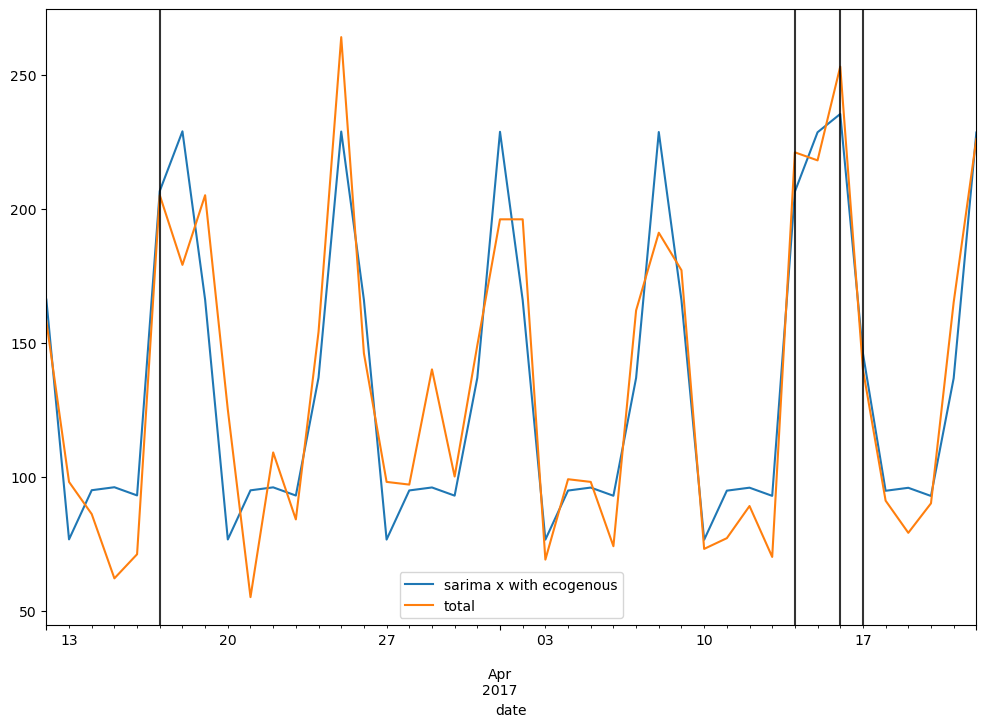

In [79]:
ax = predictions.plot(figsize = (12,8), legend = True)
test['total'].plot(legend = True)

for day in test[test['holiday']==1].index:
    ax.axvline(x = day, c = 'black', alpha = 0.8)

In [80]:
# able to hit holiday at much good way

In [82]:
rmse(test['total'], predictions)

23.01203338446795

In [83]:
## rmse is reduced looks like worth to include exogenous variable

In [84]:
### forecast into future

# business model decided to use sarima / sarimax , if substancial increase use sarimax

In [86]:
## training again with full data
model = SARIMAX(df1['total'],exog = df1[['holiday']], order = (1,0,1), seasonal_order = (1,0,1,7))

In [87]:
res = model.fit()

C:\Users\thaku\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
exog_forecast = df[478:]

## in the dataframe at end we have some values where we dont have total but have exog variable
## this can be used to  make predictions

In [91]:
df[477:].head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [92]:
## extracting exog column to give for prediction
## can be multiple cols too , to  be provided as dataframe
exog_forecast = df[478:][['holiday']]

In [94]:
len(df1)

478

In [95]:
exog_forecast.head()

,holiday
date,
2017-04-23,0
2017-04-24,0
2017-04-25,0
2017-04-26,0
2017-04-27,0


In [97]:
fcast = results.predict(len(df1), len(df1)+38, exog = exog_forecast).rename("final sarimax forcasts")

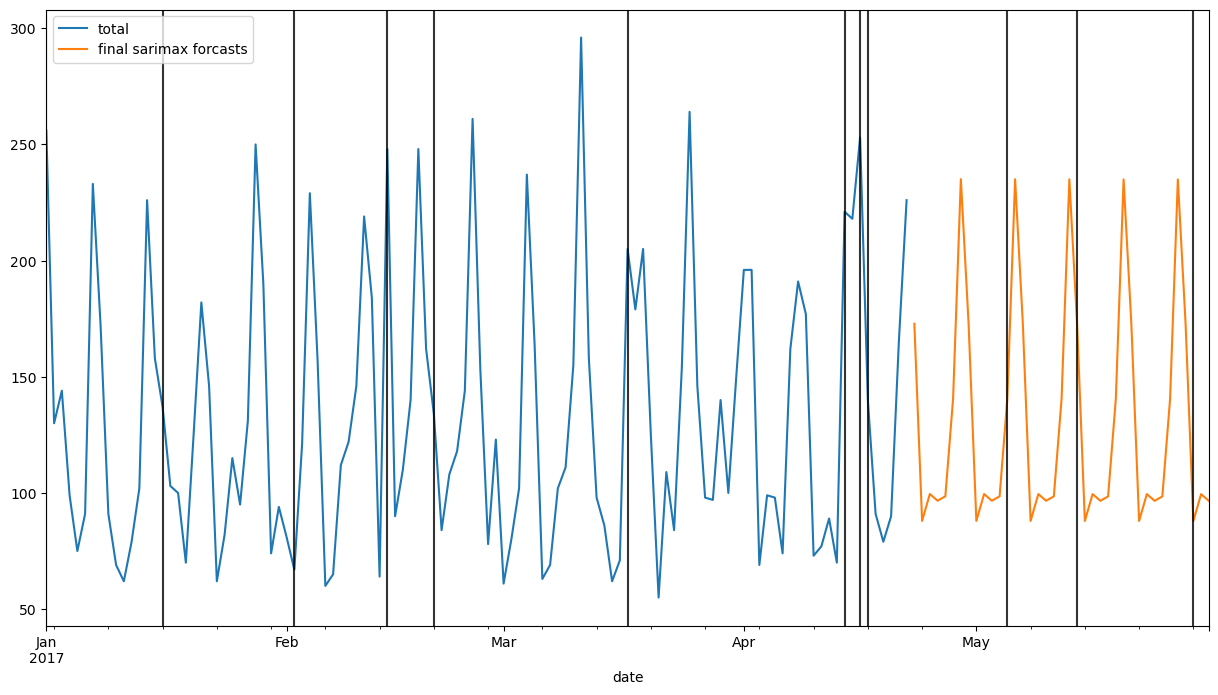

In [103]:
ax = df1['total'].loc['2017-01-01':].plot(figsize = (15,8), legend = True)
fcast.plot(legend = True)
for day in df[df['holiday']==1].index:
    ax.axvline(x = day, c = 'black', alpha = 0.8)

In [102]:
#trying to predict peaks at holidays